In [20]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [2]:
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

### mini batch K-means 文档

#### 作用
随机选择数据集，进行聚类收敛，可以节省时间，适合大规模数据集

#### 参数说明
n_cluster: int,默认8，簇心数量
init: 初始化方法，{‘k-means++’, ‘random’ or an ndarray}, default: ‘k-means++’
max_iter: 最大迭代次数，
batch: 抽样数据集大小
verbose: 详细模式

#### 属性同k-means

#### 方法同其他算法

### 生成模拟数据

In [3]:
# 给定簇心坐标
centers = [[1, 1], [-1, -1], [1, -1]]
X, Y = make_blobs(
    n_samples=3000, centers=centers, 
    cluster_std=0.7, random_state=9, n_features=2
)

### K-means

In [6]:
km = KMeans(n_clusters=3, init='k-means++', random_state=9)

In [7]:
km_start = time.time()
km.fit(X, Y)
km_end = time.time()
print('K-means 算法耗时:', (km_end - km_start))

K-means 算法耗时: 0.05452394485473633


### mini batch k-means

In [8]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, random_state=9)

In [9]:
mbk_start = time.time()
mbk.fit(X, Y)
mbk_end = time.time()
print('mini batch K-means 算法耗时:', (mbk_end - mbk_start))

mini batch K-means 算法耗时: 0.028158903121948242


In [10]:
# 结果预测
km_y = km.predict(X)
mbk_y = mbk.predict(X)

In [28]:
# 查看簇心
k_means_centers = km.cluster_centers_
mbk_means_centers = mbk.cluster_centers_
print('k-means 算法簇心', k_means_centers)
print('mini batch k-means 簇心', mbk_means_centers)

# 簇分类统一
order = pairwise_distances_argmin(k_means_centers, mbk_means_centers)
order

k-means 算法簇心 [[ 1.00892606  1.08283898]
 [-1.05050594 -0.988086  ]
 [ 1.1107615  -1.01644756]]
mini batch k-means 簇心 [[ 1.141761   -1.10565927]
 [-1.03223212 -0.96969584]
 [ 1.0265285   0.98460784]]


array([2, 1, 0])

### 画图

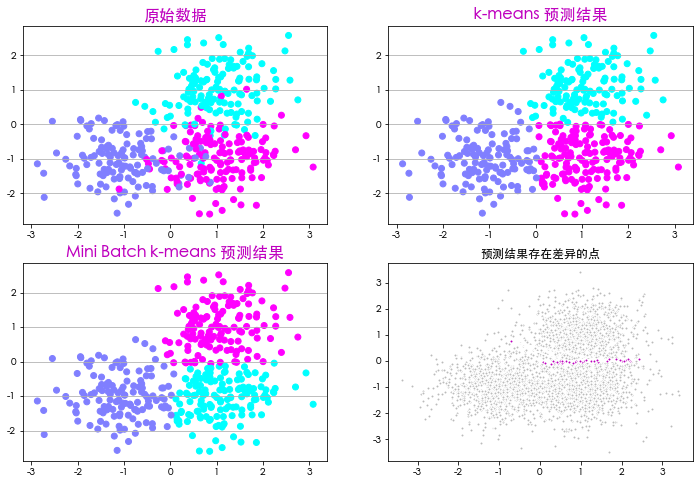

In [59]:
n = 400
plt.figure(facecolor='w', figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X[:n, 0], X[:n, 1], c=Y[:n], cmap='cool')
plt.title('原始数据', fontsize=16, color='m')
plt.grid(b=True, axis='y')

plt.subplot(2, 2, 2)
plt.scatter(X[:n, 0], X[:n, 1], c=km_y[:n], cmap='cool')
plt.title('k-means 预测结果', fontsize=16, color='m')
plt.grid(b=True, axis='y')

plt.subplot(2, 2, 3)
plt.scatter(X[:n, 0], X[:n, 1], c=mbk_y[:n], cmap='cool')
plt.title('Mini Batch k-means 预测结果', fontsize=16, color='m')
plt.grid(b=True, axis='y')

# 结果比较,绘制差异值
diff = list(map(lambda x: (x != 0) & (x != 1) & (x != 2), km_y))
for i in range(3):
    diff += ((km_y == k) != (mbk_y == order[k]))
identic = np.logical_not(diff)
plt.subplot(2, 2, 4)
# 预测相同的
plt.plot(X[identic, 0], X[identic, 1], 'w', markerfacecolor='#bbbbbb', marker='.')
# 预测不同的
plt.plot(X[diff, 0], X[diff, 1], 'w', markerfacecolor='m', marker='.')
plt.title('预测结果存在差异的点')
plt.show()

In [54]:
# 找到分类不同的点


In [51]:
mbk_y

array([0, 1, 0, ..., 2, 1, 1], dtype=int32)

In [ ]:
km = 0, mbk = 2
